# Seoul Bike Data Project (Part 1)

In this document we take a look at the Seoul Bike Data (https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand). 
We start with some data cleaning and exploratory data analysis. In the second part of this project we train various models, including: random forests, XGBoost, and neural networks.
Along the way we use packages such as pandas, seaborn, scikit-learn, and PyTorch.

## Exploratory Data Analysis

Let's start with some exploratory data analysis (EDA) to see what patterns we might find in the data.

We are running this Jupyter notebook within our own virtual environment, so let's first make sure we have the necessary packages installed.

In [ ]:
# !pip install pandas seaborn matplotlib scikit-learn

In [18]:
import pandas as pd
data = pd.read_csv('seoul.csv', encoding='ISO-8859-1') # load dataset
data.head() # print first 5 rows

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [19]:
print(data.isnull().sum()) # check for missing values
data['Date'] = pd.to_datetime(data['Date'], format = "%d/%m/%Y") # convert to datetime format

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


Fortunately, there's no missing data. Let's move on to see some summary statistics for our data set.

In [20]:
print(data.describe()) # data summary
print(data.info())

                                Date  Rented Bike Count         Hour  \
count                           8760        8760.000000  8760.000000   
mean   2018-05-31 23:59:59.999999744         704.602055    11.500000   
min              2017-12-01 00:00:00           0.000000     0.000000   
25%              2018-03-02 00:00:00         191.000000     5.750000   
50%              2018-06-01 00:00:00         504.500000    11.500000   
75%              2018-08-31 00:00:00        1065.250000    17.250000   
max              2018-11-30 00:00:00        3556.000000    23.000000   
std                              NaN         644.997468     6.922582   

       Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
count      8760.000000  8760.000000       8760.000000       8760.000000   
mean         12.882922    58.226256          1.724909       1436.825799   
min         -17.800000     0.000000          0.000000         27.000000   
25%           3.500000    42.000000          0.9000

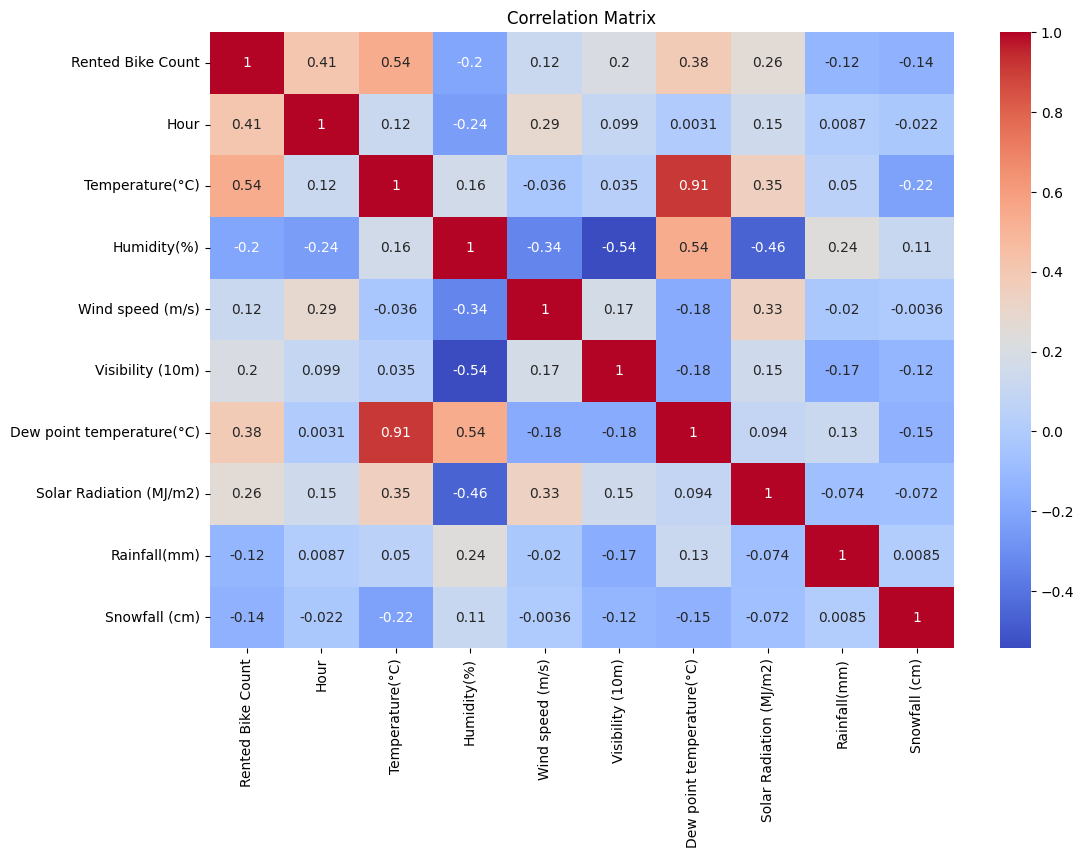

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract numeric data 
numeric_data = data.select_dtypes(include=['number'])

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

We now present various plots of the target variable against several different explanatory variables to see if there are any basic patterns.

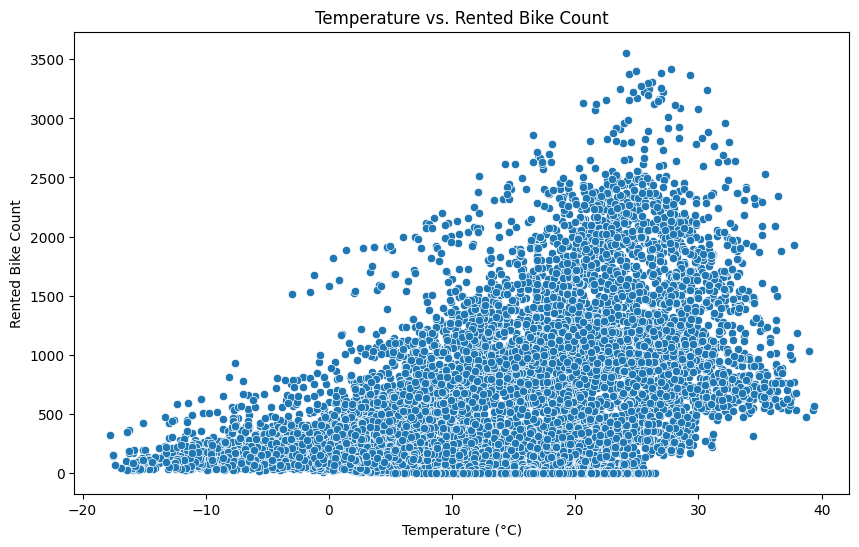

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature(°C)', y='Rented Bike Count', data=data)
plt.title('Temperature vs. Rented Bike Count')
plt.xlabel('Temperature (°C)')
plt.ylabel('Rented Bike Count')
plt.show()

It looks like the highest total bike rental counts happen to be around the warmer temperatures (provided that it's not too hot?). Let's see how this depends on the hour of day.

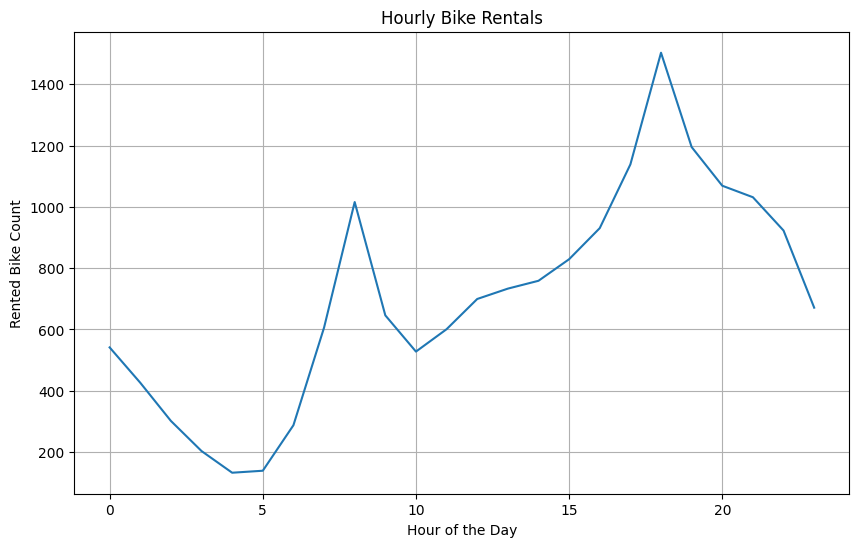

In [32]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Hour', y='Rented Bike Count', data=data, errorbar=None)
plt.title('Hourly Bike Rentals')
plt.xlabel('Hour of the Day')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()

This is very interesting because we can see clear spikes when people are heading to work (around 8-9 am) and when they are coming back from work (around 5-6 pm)!

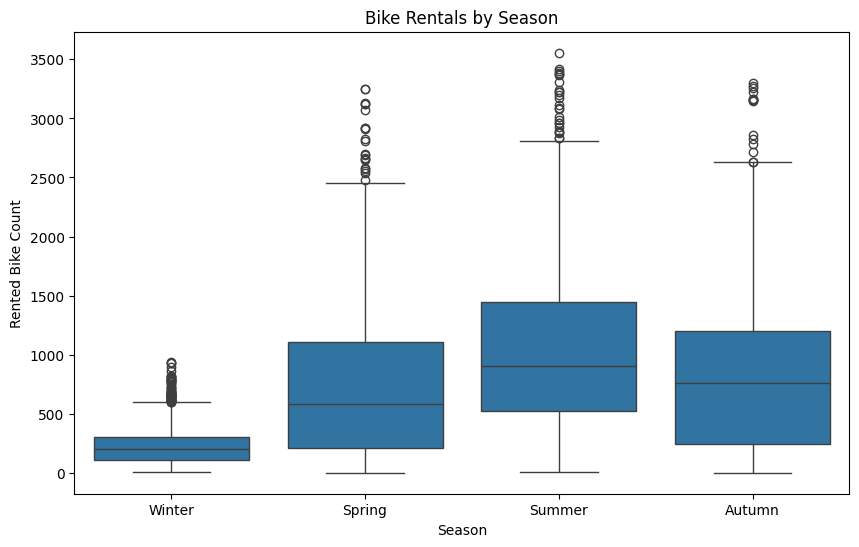

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Seasons', y='Rented Bike Count', data=data)
plt.title('Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Rented Bike Count')
plt.show()

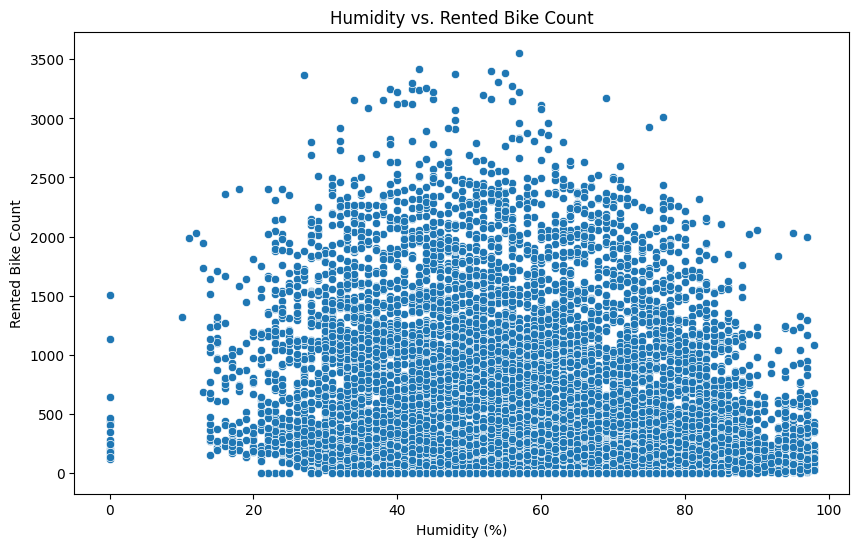

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Humidity(%)', y='Rented Bike Count', data=data)
plt.title('Humidity vs. Rented Bike Count')
plt.xlabel('Humidity (%)')
plt.ylabel('Rented Bike Count')
plt.show()

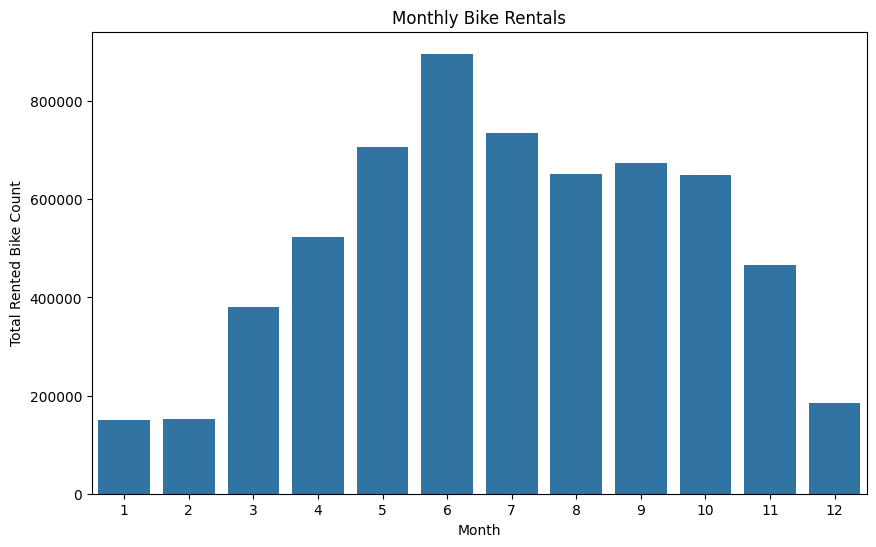

In [26]:
data['Month'] = data['Date'].dt.month
monthly_trend = data.groupby('Month')['Rented Bike Count'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Rented Bike Count', data=monthly_trend)
plt.title('Monthly Bike Rentals')
plt.xlabel('Month')
plt.ylabel('Total Rented Bike Count')
plt.show()

Again, the summer months seem to be the most popular for bike rentals.

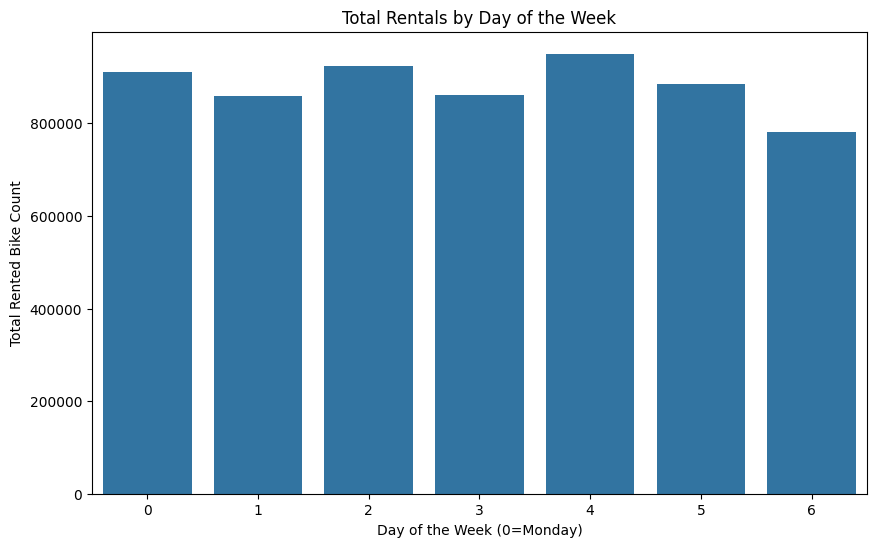

In [27]:
data['Weekday'] = data['Date'].dt.dayofweek
weekday_trend = data.groupby('Weekday')['Rented Bike Count'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Weekday', y='Rented Bike Count', data=weekday_trend)
plt.title('Total Rentals by Day of the Week')
plt.xlabel('Day of the Week (0=Monday)')
plt.ylabel('Total Rented Bike Count')
plt.show()

**Key insights:** Based on the plots above, it seems that warm, summer days result in the most bike rentals. Additionally, the time of day seems to be very important, as there are clear spikes around 8/9 am and 5/6 pm when people are going to work and coming back from work.

## Feature Engineering

Having completed our exploratory data analysis, we are now going to do some feature engineering! Let's do the following: 
- Scale/normalize our continuous variables
- Extract more features from the date/time variables
- One-hot encode our categorical variables

In [28]:
from sklearn.preprocessing import StandardScaler

continuous_vars = ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 
                       'Visibility (10m)', 'Dew point temperature(°C)', 
                       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
scaler = StandardScaler()

for var in continuous_vars:
    normalized_feature_name = f"{var}_normalized"
    data[normalized_feature_name] = scaler.fit_transform(data[[var]])
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),...,Month,Weekday,Temperature(°C)_normalized,Humidity(%)_normalized,Wind speed (m/s)_normalized,Visibility (10m)_normalized,Dew point temperature(°C)_normalized,Solar Radiation (MJ/m2)_normalized,Rainfall(mm)_normalized,Snowfall (cm)_normalized
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,...,12,4,-1.513957,-1.042483,0.458476,0.925871,-1.659605,-0.655132,-0.1318,-0.171891
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,...,12,4,-1.539074,-0.993370,-0.892561,0.925871,-1.659605,-0.655132,-0.1318,-0.171891
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,...,12,4,-1.580936,-0.944257,-0.699556,0.925871,-1.667262,-0.655132,-0.1318,-0.171891
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,...,12,4,-1.597680,-0.895144,-0.796059,0.925871,-1.659605,-0.655132,-0.1318,-0.171891
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,...,12,4,-1.580936,-1.091596,0.554978,0.925871,-1.736177,-0.655132,-0.1318,-0.171891


In [29]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Weekday'] = data['Date'].dt.weekday
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),...,Temperature(°C)_normalized,Humidity(%)_normalized,Wind speed (m/s)_normalized,Visibility (10m)_normalized,Dew point temperature(°C)_normalized,Solar Radiation (MJ/m2)_normalized,Rainfall(mm)_normalized,Snowfall (cm)_normalized,Year,Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,...,-1.513957,-1.042483,0.458476,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,2017,1
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,...,-1.539074,-0.993370,-0.892561,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,2017,1
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,...,-1.580936,-0.944257,-0.699556,0.925871,-1.667262,-0.655132,-0.1318,-0.171891,2017,1
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,...,-1.597680,-0.895144,-0.796059,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,2017,1
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,...,-1.580936,-1.091596,0.554978,0.925871,-1.736177,-0.655132,-0.1318,-0.171891,2017,1


In [30]:
data = pd.get_dummies(data, columns=['Seasons', 'Holiday', 'Functioning Day'], drop_first=True)
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),...,Solar Radiation (MJ/m2)_normalized,Rainfall(mm)_normalized,Snowfall (cm)_normalized,Year,Day,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,...,-0.655132,-0.1318,-0.171891,2017,1,False,False,True,True,True
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,...,-0.655132,-0.1318,-0.171891,2017,1,False,False,True,True,True
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,...,-0.655132,-0.1318,-0.171891,2017,1,False,False,True,True,True
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,...,-0.655132,-0.1318,-0.171891,2017,1,False,False,True,True,True
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,...,-0.655132,-0.1318,-0.171891,2017,1,False,False,True,True,True


Having completed our exploratory data analysis and feature engineering, we save this data set and load it into a new notebook where we will focus on model selection and training.

In [31]:
data.to_csv('seoul_processed.csv', index=False)